In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import math

In [ ]:
drive.mount('/content/drive',force_remount=True)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train=train_datagen.flow_from_directory('/content/drive/MyDrive/Fruit/Train_fruit',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/Fruit/Test_fruit',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')

Mounted at /content/drive
Found 64 images belonging to 10 classes.
Found 74 images belonging to 10 classes.


In [ ]:
train.class_indices

{'chanh': 0,
 'chuoi': 1,
 'dau': 2,
 'dua': 3,
 'duahau': 4,
 'kiwi': 5,
 'nho': 6,
 'tao': 7,
 'thanhlong': 8,
 'xoai': 9}

In [ ]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(10,activation='Softmax'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 128)    0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      73792     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)      

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer = 'adam', loss ='categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]
history=model.fit(train,
                  steps_per_epoch=len(train),
                  batch_size = 32,
                  epochs=50,
                  validation_data=test,
                  validation_steps=len(test),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/50
2/2 [==============================] - 21s 20s/step - loss: 4.6574 - accuracy: 0.0781 - val_loss: 2.3727 - val_accuracy: 0.1486
Epoch 2/50
2/2 [==============================] - 2s 2s/step - loss: 2.3116 - accuracy: 0.1875 - val_loss: 2.2799 - val_accuracy: 0.1351
Epoch 3/50
2/2 [==============================] - 2s 2s/step - loss: 2.2709 - accuracy: 0.1875 - val_loss: 2.1089 - val_accuracy: 0.2162
Epoch 4/50
2/2 [==============================] - 3s 2s/step - loss: 1.9833 - accuracy: 0.2812 - val_loss: 2.0328 - val_accuracy: 0.1757
Epoch 5/50
2/2 [==============================] - 2s 2s/step - loss: 1.8520 - accuracy: 0.3281 - val_loss: 2.0025 - val_accuracy: 0.2162
Epoch 6/50
2/2 [==============================] - 2s 2s/step - loss: 1.7213 - accuracy: 0.4531 - val_loss: 1.8600 - val_accuracy: 0.3784
Epoch 7/50
2/2 [==============================] - 2s 2s/step - loss: 1.4316 - accuracy: 0.5938 - val_loss: 2.0006 - val_accuracy: 0.2973
Epoch 8/50
2/2 [=======================

In [ ]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  4.893266201019287
Độ chính xác kiểm tra là:  0.47297295928001404


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


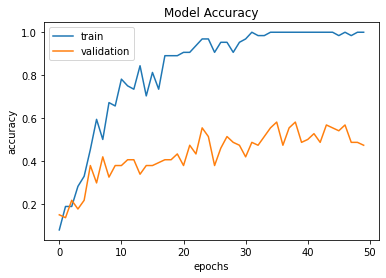

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper_left')

In [ ]:
model.save('Traicay_CNN.h5')

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('Traicay_CNN.h5')

In [ ]:
fruit = [
'chanh',
 'chuoi',
 'dau',
 'dua',
 'duahau',
 'kiwi',
 'nho',
 'tao',
 'thanhlong',
 'xoai']

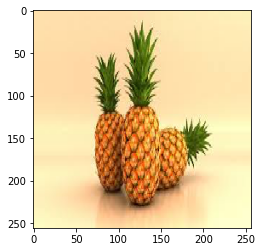

In [ ]:
img = load_img("dua15.jpg",target_size = (256,256))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255


In [ ]:
np.argmax(model.predict(img),axis=1)
#'chanh': 0,
#'chuoi': 1,
#'dau': 2,
#'dua': 3,
#'duahau': 4,
#'kiwi': 5,
#'nho': 6,
#'tao': 7,
#'thanhlong': 8,
#'xoai': 9

array([3])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Traicay_CNN.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2022-05-25 16:53:18--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-05-25 16:53:18 (30.6 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Traicay_CNN.ipynb to pdf
[NbConvertApp] Support files will be in Traicay_CNN_files/
[NbConvertApp] Making directory ./Traicay_CNN_files
[NbConvertApp] Making directory ./Traicay

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'